##### Meet Patel 
##### MISY 408

## Project 8- MISY408

### Titanic Dataset

**Attributes**

* Survived: 0 = Not survived, 1 = Survived
* Pclass: Ticket class 1 = 1st class, 2 = 2nd class, 3 = 3rd class
* Name: Name of passenger
* Sex: male, female
* Age: Age of passenger
* Sibsp: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic
* Ticket: Ticket number
* Fare: Passenger fare
* Cabin: Cabin number
* Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Question1: Import the required libraries and read Titanic.csv file and save it in df dataframe, display the first five rows of df dataframe**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Question 2:**

        1) check the shape of dataset
        3) Check whether there is any missing values
        4) drop missing values

In [2]:
df.shape

(891, 12)

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df=df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Question 3: Drop PassengerId, Name, Ticket, and Cabin from df dataframe and then display first 5 rows of df dataframe**

In [5]:
df = df.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


**Question 4: get dummies for categorical variables in df dataframe and display first 5 rows (type your code after the code that I have typed in the following)**

In [6]:
## Because Pclass column contain numbers, I converted it to category variables for get_dummies to work for that column as well.
df['Pclass']= df['Pclass'].astype('category')

df2 = pd.get_dummies(df)
df2.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
6,0,54.0,0,0,51.8625,1,0,0,0,1,0,0,1
10,1,4.0,1,1,16.7000,0,0,1,1,0,0,0,1
11,1,58.0,0,0,26.5500,1,0,0,1,0,0,0,1


* display the list of columns in df dataframe

In [7]:
df2.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

**Question 5: Set up the X and y DataFrame: Set y to Survived. Set X to all Pclass binary variables and all Sex binary variables**

(it is optional to include the other variables in your model. But, you should make sure to scale the non-binary variables before including them in the model)

In [8]:


x = df2[['Pclass_1','Pclass_2', 'Pclass_3','Sex_female','Sex_male']]

y = df2[['Survived']]



**Question 6: Split the dataset into the Training set and Test set (30 percent Test, 70 percent Train)**

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

* Check the shape of your X_train

In [10]:
x_train.shape

(128, 5)

**Question 7**

* Import Keras Libraries

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization


* Create the model architecture (you can start by having 1 hidden layer and 5 nodes in the hidden layer and compile the model. After getting the accuracy, you can add more layers to the model to improve the accuracy of your model or make any adjustments. At the end of the notebook you should explain what you did to improve model)

In [12]:
model = Sequential() #1


model.add(Dense(5, activation='relu', input_dim=x_train.shape[1], name='first_hidden')) 
model.add(Dropout(0.2))
model.add(BatchNormalization())  # Re-centers the results to ensure they dont drift

# second hidden layer.  Use relu
model.add(Dense(1, activation = 'sigmoid', name='output'))
model.summary()
model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden (Dense)        (None, 5)                 30        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 batch_normalization (BatchN  (None, 5)                20        
 ormalization)                                                   
                                                                 
 output (Dense)              (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 46
Non-trainable params: 10
_________________________________________________________________


* Compile the model

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Question 8:**

* Train the Model Using Training Data Set (you can start by 50 epochs and 10 batch size. After getting the accuracy, you can change these values to other values (for example: 100  epochs and 10 batch_size or other numbers) to improve the accuracy of your model. At the end of the notebook you should explain what you did to improve your model)

In [14]:
history = model.fit(x_train, y_train, batch_size = 10,validation_data=(x_test,y_test), epochs = 100, verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 23ms/step - loss: 0.6885 - accuracy: 0.6016 - val_loss: 0.6883 - val_accuracy: 0.7636
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.6875 - val_loss: 0.6840 - val_accuracy: 0.7636
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.6250 - val_loss: 0.6791 - val_accuracy: 0.7636
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.6719 - val_loss: 0.6737 - val_accuracy: 0.7636
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6698 - accuracy: 0.6875 - val_loss: 0.6684 - val_accuracy: 0.7636
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6683 - accuracy: 0.6250 - val_loss: 0.6619 - val_accuracy: 0.7636
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6569 - accuracy: 0.6328 - val_loss: 0.6560 - val_accuracy: 0.7636
Epoch 8/100


* Print the Model Accuracy and Loss for Training Data

In [15]:
loss, accuracy = model.evaluate(x_train, y_train)
print('Loss: %.2f'% (loss))
print('Accuracy: %.2f'% (accuracy*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.7344
Loss: 0.49
Accuracy: 73.44


* Create a Confusion Matrix for Training Data

In [16]:
import numpy as np
predictions_train= np.argmax(model.predict(x_train), axis=1) 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,predictions_train)

array([[47,  0],
       [81,  0]], dtype=int64)

* Interpret the confusion matrix

out of the 128 observations, the model correctly predicted 80 observations

**Question 9:**

* Print the Model Accuracy and Loss for Test Data

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss: %.2f'% (loss))
print('Accuracy: %.2f'% (accuracy*100))

2/2 [==============================] - 0s 8ms/step - loss: 0.4296 - accuracy: 0.8000
Loss: 0.43
Accuracy: 80.00


* Create a Confusion Matrix for Test Data

In [18]:
import numpy as np

predictions_test = np.argmax(model.predict(x_test), axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions_test)

array([[13,  0],
       [42,  0]], dtype=int64)

* Interpret the confusion matrix

in the test data, 43 observations were correctly predicted and from that 10 were not predicited to survive but survived.

**Question 10**

* Visualize Accurancy for train and test

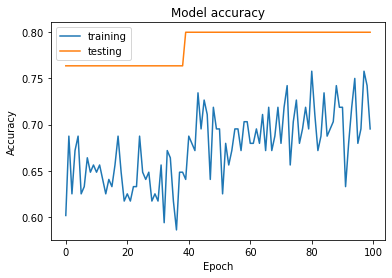

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='testing')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

* Visualize Loss for train and test

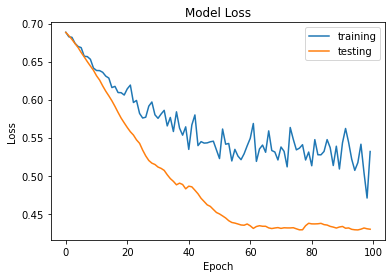

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='testing')
plt.title('Model Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

* Interpret your results. Is test data accuracy comparable to train data accuracy? Is there any model overfit?

the test data accuracy follows the  a similiar negative trends as the train data. However, ther is an model overfit because the two data sets are not perfectly close. 

**Question 11:** 

Please explain what model architecture you originally created. What was its accuracy and loss? What changes did you make to the model architecture to improve it? 

###### The accuruacy and loss of the original model architecture was 67 loss and 63 accuruacy